In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

In [2]:
itas_data = pd.read_excel('itas_2010-2017_v7.xls')

In [124]:
#   per_year: bool,
#           if True, coauthors
#           will contain coathors for each year,
#           if False, see "year" parameter
#     year: int, 
#           if "per_year" is False return coauthors for given year,
#           if None, return coauthors for all years
# Я передумал подавать в качестве аргументов start_year, end_year
# потому что могут возникнуть и другие столбцы вроде тематики или пола
# проще в саму функцию передавать уже обработанный дата фрейм (нужные года, и пр.)

def get_coauthors(df_data):
    '''
    input
    
    df_data: pandas Data Frame,
             with columns: title, year, author_id_new
                
    return
    
    adjacency_matrix: numpy ndarray, 
                      adjacency coauthorship matrix
    authors: authors name list (indices are the same as in adjacency matrix)
    n_papers: numpy ndarray,
              total number of papers for each author
    
    EXAMPLE:
    # return coauthorship matrix for 2013-2015 years 
    
    itas2013_2015 = itas_data.loc[(itas_data.year >= 2013) & (itas_data.year <= 2015)].copy()
    adj, authors, n_papers = get_coauthors(itas2013_2015) 
    
    '''


    title_author_counts = df_data.groupby(by=['title', 'author_id_new']).count()
    
    titles, authors = title_author_counts.index.levels
    title_index, author_index = title_author_counts.index.labels
    
    incidence_matrix = pd.crosstab(author_index, title_index).values
    
    adjacency_matrix = incidence_matrix.dot(incidence_matrix.T)
    n_papers = np.diag(adjacency_matrix).copy()
    np.fill_diagonal(adjacency_matrix, 0)
    
    
    return adjacency_matrix, authors, n_papers


# Usefull commands

## get genders of given authors
# itas_data.drop_duplicates(subset='author_id_new')\
# .Gender[itas_data.drop_duplicates(subset='author_id_new').author_id_new.isin(authors)].values

## get n_papers by year for given author
# itas_data[itas_data.author_id_new == 'Беляев Михаил']\
# .sort_values(by=['author_id_new', 'year']).groupby(by=['author_id_new', 'year']).count()


## get all coauthors of given author
# mbelyaev_papers = itas_data[itas_data.author_id_new == 'Беляев Михаил'].title.values
# itas_data.loc[itas_data.title.isin(mbelyaev_papers)].\
# drop_duplicates('author_id_new').author_id_new.values


# get egocentric graph of given author
# mbelyaev_papers = itas_data[itas_data.author_id_new == 'Беляев Михаил'].title.values

# itas_data.loc[itas_data.title.isin(mbelyaev_papers)].\
# drop_duplicates('author_id_new').author_id_new.values

# mbelyaev_ego = itas_data.loc[itas_data.title.isin(mbelyaev_papers)\
# & (itas_data.author_id_new != 'Беляев Михаил')].copy()

# adj, authors, n_papers = get_coauthors(mbelyaev_ego) 

def get_egocentric(df_data, author='Беляев Михаил'):
    
    author_papers = itas_data[itas_data.author_id_new == author].title.values

#     author_ego = itas_data.loc[itas_data.title.isin(author_papers)\
#     & (itas_data.author_id_new != author)].copy()

    coauthors = itas_data.loc[itas_data.title.isin(author_papers)].\
    drop_duplicates('author_id_new').author_id_new.values
    
    author_ego = itas_data.loc[(itas_data.author_id_new.isin(coauthors))\
                  & (itas_data.author_id_new != author)].copy()

    adj, authors, n_papers = get_coauthors(author_ego) 
    
    # n_papers is +- not legit since it within 

    return adj, authors, n_papers



In [67]:
adj, authors, n_papers = get_coauthors(itas_data)

In [142]:
itas_data.groupby('author_id_new').count().sort_values('title', ascending=False)

,title,year,author,Name,Surname,Gender
author_id_new,,,,,,
Хоров Евгений,51,51,51,51,51,51
Базыкин Г.А.,47,47,47,47,47,47
Миронов Андрей,43,43,43,43,43,43
Николаев Дмитрий,31,31,31,31,31,31
Кондрашов А.С.,28,28,28,28,28,28
Зяблов В.В.,26,26,26,26,26,26
Беляев Михаил,25,25,25,25,25,25
Бурнаев Евгений,24,24,24,24,24,24
Фаворов Александр,23,23,23,23,23,23


In [180]:
adj, authors, n_papers = get_egocentric(itas_data, 'Беляев Михаил')

In [181]:
g = nx.from_numpy_matrix(adj)

In [182]:
for comp in nx.connected_components(g):
    print(comp)

{0, 2, 4, 36, 6, 11, 13, 20, 26, 30}
{1}
{3, 5, 7, 9, 10, 12, 15, 17, 18, 19, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35}
{8, 25, 14}
{16}
{21}


In [183]:
largest_cc = max(nx.connected_components(g), key=len)
index = list(largest_cc)
adj_cc = adj[:, index][index, :]
gg = nx.from_numpy_matrix(adj_cc, )

In [184]:
print(adj.shape[0], adj_cc.shape[0])



37 21


In [201]:
g1 = g.subgraph({0, 2, 4, 36, 6, 11, 13, 20, 26, 30})
authors1 = authors[[0, 2, 4, 36, 6, 11, 13, 20, 26, 30]].values
g2 = g.subgraph({3, 5, 7, 9, 10, 12, 15, 17, 18, 19, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35})
authors2 = authors[[3, 5, 7, 9, 10, 12, 15, 17, 18, 19, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35]].values


authors1 = dict(zip([0, 2, 4, 36, 6, 11, 13, 20, 26, 30], authors1))
authors2 = dict(zip([3, 5, 7, 9, 10, 12, 15, 17, 18, 19, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35], authors2))

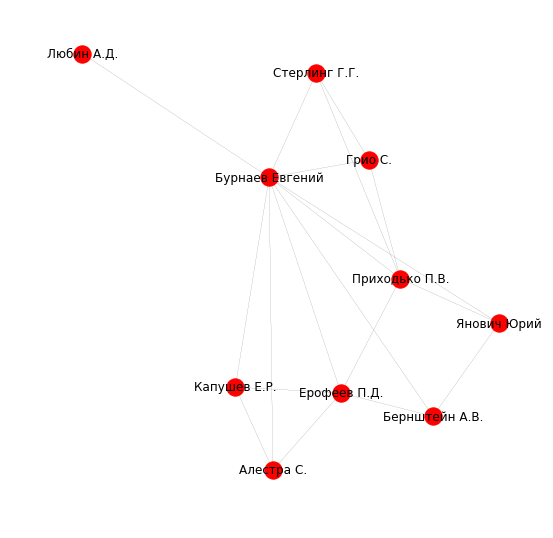

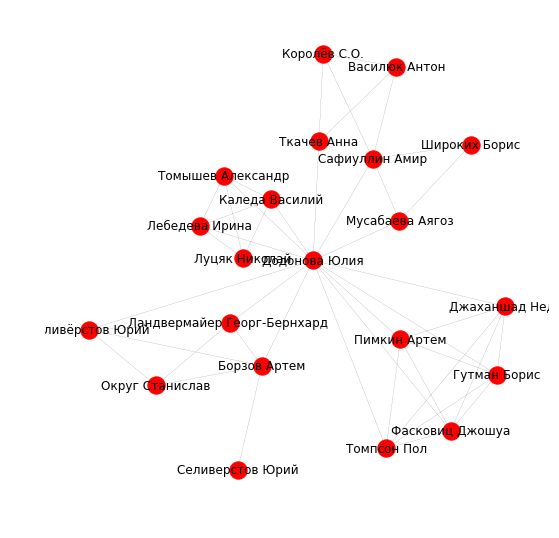

In [204]:
plt.figure(figsize=(7,7))
nx.draw_kamada_kawai(g1, width=.1, labels=authors1)#node_size=10*n_papers, )

plt.figure(figsize=(7,7))
nx.draw_kamada_kawai(g2, width=.1, labels=authors2)#node_size=10*n_papers, )

In [200]:
authors1

{'Алестра С.': 0,
 'Бернштейн А.В.': 2,
 'Бурнаев Евгений': 4,
 'Грио С.': 6,
 'Ерофеев П.Д.': 11,
 'Капушев Е.Р.': 13,
 'Любин А.Д.': 20,
 'Приходько П.В.': 26,
 'Стерлинг Г.Г.': 30,
 'Янович Юрий': 36}

In [187]:
authors

Index(['Алестра С.', 'Беляева Д.Г.', 'Бернштейн А.В.', 'Борзов Артем',
       'Бурнаев Евгений', 'Василюк Антон', 'Грио С.', 'Гутман Борис',
       'Денисенко Александр', 'Джаханшад Неда', 'Додонова Юлия',
       'Ерофеев П.Д.', 'Каледа Василий', 'Капушев Е.Р.',
       'Кондратенко Владимир', 'Королёв С.О.', 'Кривов Е.А.',
       'Ландвермайер Георг-Бернхард ', 'Лебедева Ирина', 'Луцяк Николай',
       'Любин А.Д.', 'Меринов П.А.', 'Мусабаева Аягоз', 'Округ Станислав',
       'Пимкин Артем', 'Писов Максим', 'Приходько П.В.', 'Сафиуллин Амир',
       'Селиверстов Юрий', 'Селивёрстов Юрий', 'Стерлинг Г.Г.', 'Ткачев Анна',
       'Томпсон Пол', 'Томышев Александр', 'Фасковиц Джошуа', 'Широких Борис',
       'Янович Юрий'],
      dtype='object', name='author_id_new')